## Loading Librarys

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [133]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

## Loading Data

In [47]:
data = pd.read_csv('Datasets/trainHousePrices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [48]:
cat_cols = data.select_dtypes('object').columns

In [49]:
len(cat_cols)

43

In [50]:
data.drop(columns=cat_cols, inplace=True)

In [51]:
# removing missing values
data.dropna(axis = 0, how ='any',inplace=True) 

In [52]:
data.shape

(1121, 38)

In [53]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## Data Preprocessing - Standardization

In [54]:
data1 = data.copy()
data1.shape

(1121, 38)

In [60]:
feature_cols = data1.drop(columns=['SalePrice'], axis=1).columns
feature_cols.shape

(37,)

In [61]:
scaler = StandardScaler()

In [62]:
data1[feature_cols] = scaler.fit_transform(data1[feature_cols])

In [64]:
data1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.725807,0.092295,-0.233570,-0.205885,0.570704,-0.525499,0.992930,0.823953,0.462009,0.571581,...,-0.760257,0.231036,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,0.153084,208500
1,-1.723429,-0.865696,0.384834,-0.064358,-0.153825,2.284122,0.120665,-0.460746,-0.572748,1.152559,...,1.686090,-0.716739,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,-0.498715,-0.596291,181500
2,-1.721052,0.092295,-0.109889,0.138702,0.570704,-0.525499,0.928317,0.776371,0.282510,0.101672,...,-0.760257,-0.064173,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,0.990125,0.153084,223500
3,-1.718674,0.331793,-0.439705,-0.070512,0.570704,-0.525499,-1.850006,-0.746235,-0.572748,-0.475034,...,-0.760257,-0.172934,4.083851,-0.11253,-0.278676,-0.072999,-0.141407,-1.615345,-1.345665,140000
4,-1.716296,0.092295,0.549742,0.509132,1.295234,-0.525499,0.896011,0.681208,1.275032,0.462647,...,0.815913,0.588393,-0.356622,-0.11253,-0.278676,-0.072999,-0.141407,2.106755,0.153084,250000


## Feature Selection Techniques

### Recursive Feature Elimination (RFE)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor


In [65]:
# input split
X = data1.drop(columns=['SalePrice'], axis=1)
y = data1['SalePrice']

In [66]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)

In [91]:
feature_list=[]
for i, col in zip(range(X.shape[1]), X.columns):
    print(i)
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")
    if rfe.ranking_[i] == 1:
        feature_list.append(col)

0
Id selected=False rank=14
1
MSSubClass selected=False rank=17
2
LotFrontage selected=False rank=11
3
LotArea selected=False rank=2
4
OverallQual selected=True rank=1
5
OverallCond selected=False rank=9
6
YearBuilt selected=False rank=3
7
YearRemodAdd selected=False rank=6
8
MasVnrArea selected=False rank=20
9
BsmtFinSF1 selected=True rank=1
10
BsmtFinSF2 selected=False rank=26
11
BsmtUnfSF selected=False rank=18
12
TotalBsmtSF selected=True rank=1
13
1stFlrSF selected=False rank=5
14
2ndFlrSF selected=True rank=1
15
LowQualFinSF selected=False rank=32
16
GrLivArea selected=True rank=1
17
BsmtFullBath selected=False rank=19
18
BsmtHalfBath selected=False rank=31
19
FullBath selected=False rank=27
20
HalfBath selected=False rank=16
21
BedroomAbvGr selected=False rank=12
22
KitchenAbvGr selected=False rank=28
23
TotRmsAbvGrd selected=False rank=23
24
Fireplaces selected=False rank=21
25
GarageYrBlt selected=False rank=10
26
GarageCars selected=False rank=7
27
GarageArea selected=False r

In [93]:
feature_list

['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea']

<AxesSubplot: >

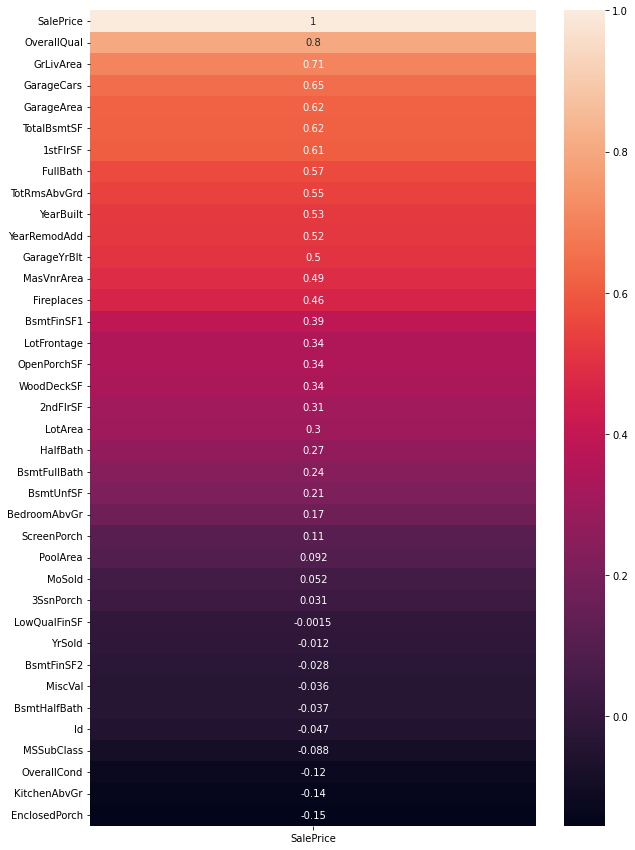

In [70]:
plt.figure(figsize=(10,15))
sns.heatmap(data1.corr()[['SalePrice']].sort_values(by=['SalePrice'], ascending=False),annot=True)

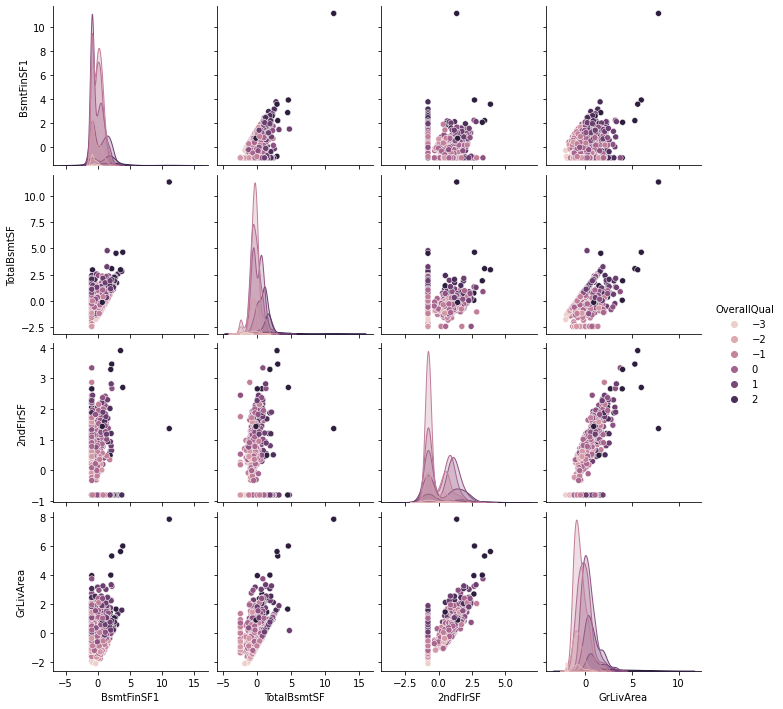

In [80]:
sns.pairplot(data1[feature_list],hue='OverallQual')

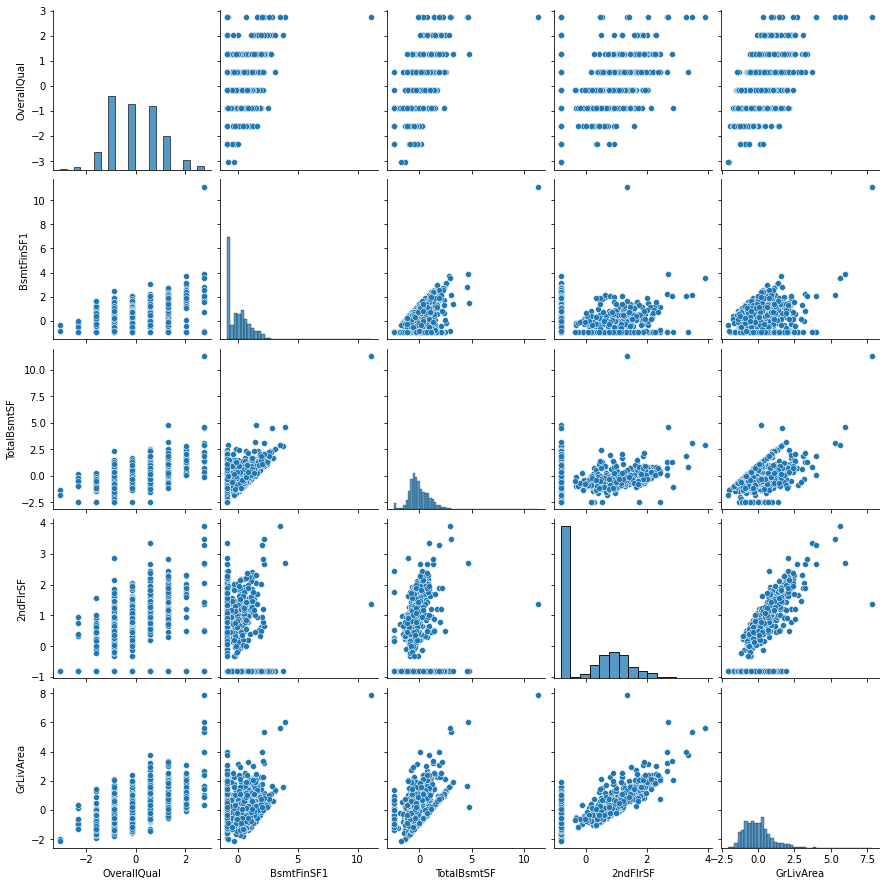

In [81]:
sns.pairplot(data1[feature_list])

In [100]:
feature_withtarget = feature_list.copy()
feature_withtarget.append('SalePrice')
feature_withtarget

['OverallQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'SalePrice']

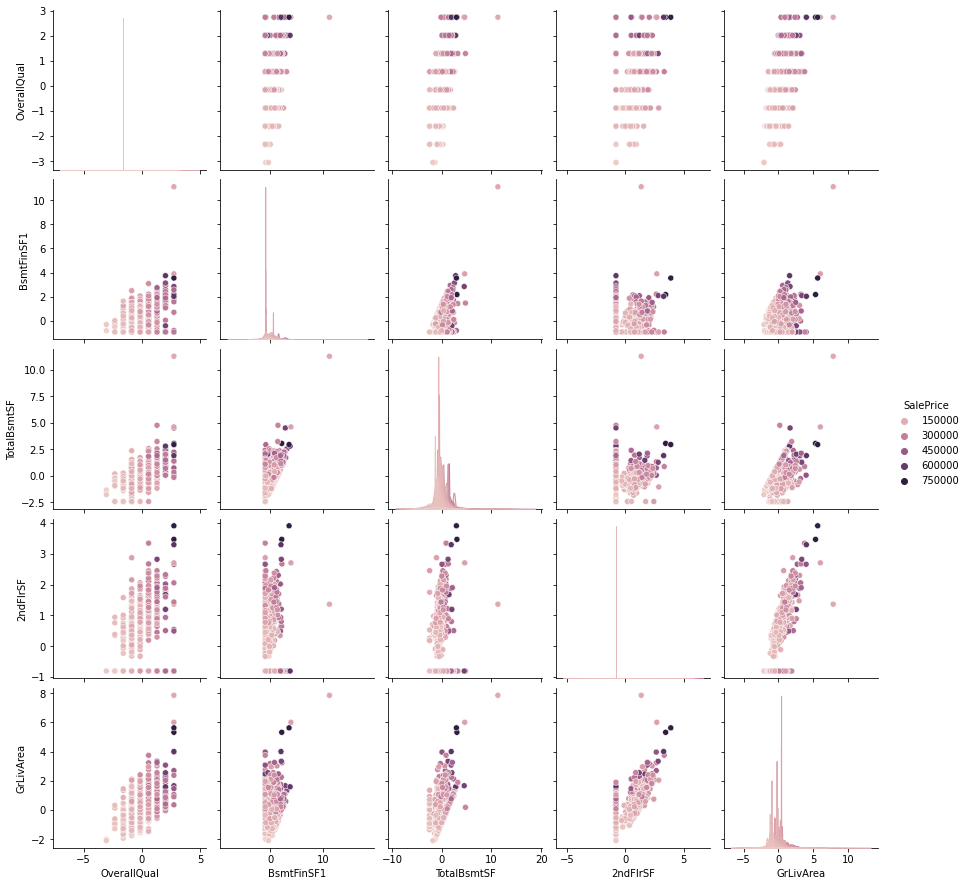

In [103]:
sns.pairplot(data1[feature_withtarget],hue='SalePrice')

## Outlier Detection and Removal

In [118]:
df = data1[feature_withtarget]
df.shape

(1121, 6)

In [119]:
class OutlierTreatment:
    
    def __init__(self, dff):
        self.dff = dff
        
    def getInfo(self):
        return (self.dff.shape)
    
    def outlier(self):
        Q1 = self.dff.quantile(0.25)
        Q3 = self.dff.quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        return lower_limit, upper_limit
        
    def countoutlier(self, dfa):
        self.lower_limit, self.upper_limit = self.outlier()
        Total_outlier = len(dfa[(self.dff <= self.lower_limit)|(self.dff >= self.upper_limit)])
        return Total_outlier
    
    def cleanoutlier(self, dfa):
        self.lower_limit, self.upper_limit = self.outlier()
        dfx = dfa[(self.dff>self.lower_limit)&(self.dff<self.upper_limit)]
        return dfx

In [123]:
X = df.drop(columns=['SalePrice'], axis=1).columns
for i in X:
    print(i)

OverallQual
BsmtFinSF1
TotalBsmtSF
2ndFlrSF
GrLivArea


In [125]:
# ruuning function to each column only one time until to remove outlier
df2=df.copy()
for i in X:
        d = OutlierTreatment(df2[i])
        d.getInfo()
        d.outlier()
        d.countoutlier(df2)
        df2 = d.cleanoutlier(df2)
df2.shape

(1039, 6)

In [126]:
for i in df2.columns:
    print(i)

OverallQual
BsmtFinSF1
TotalBsmtSF
2ndFlrSF
GrLivArea
SalePrice


<AxesSubplot: >

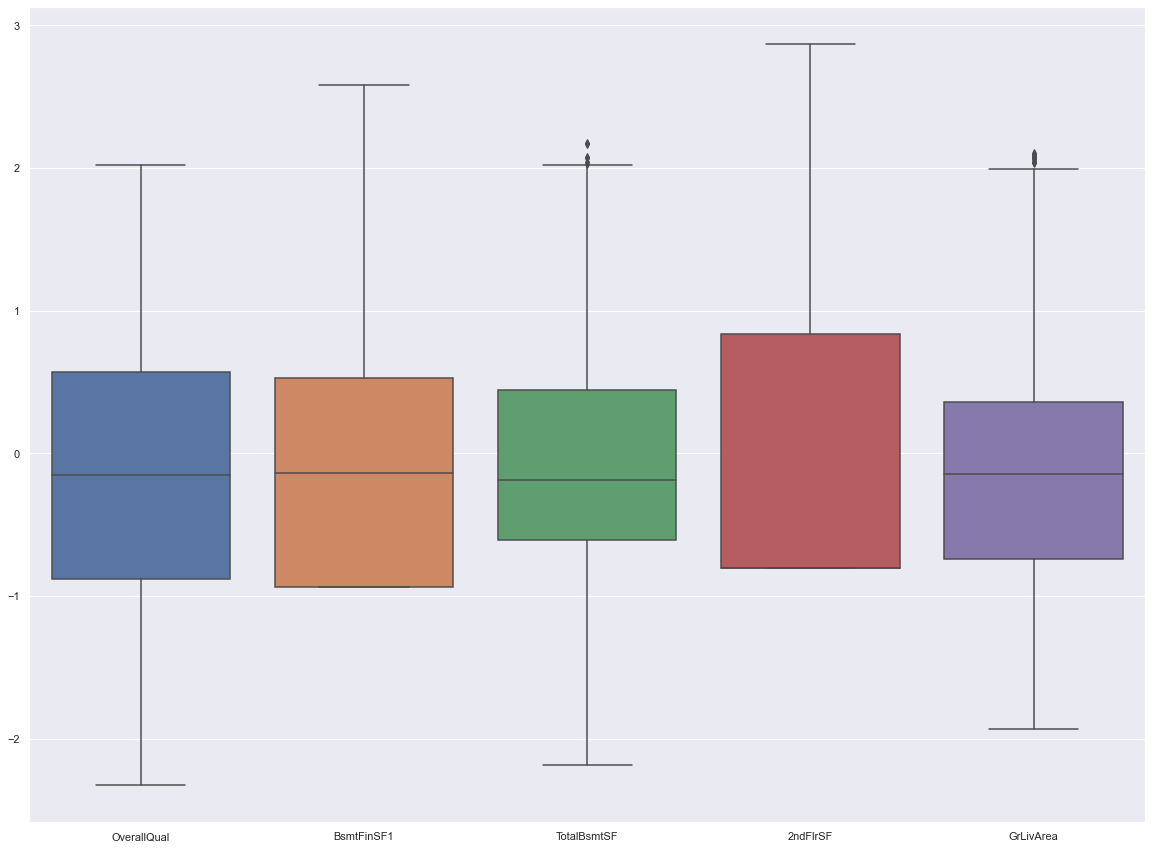

In [128]:
plt.figure(figsize=(20,15))
sns.set(style='darkgrid')
sns.boxplot(data=df2[X])

## Multiple Linear Regression

In [116]:
class Metrics:
    def evaluate(self, model, features, target):
        ypred = model.predict(features)
        mae = mean_absolute_error(y_true=target, y_pred=ypred)
        mse = mean_squared_error(y_true=target, y_pred=ypred)
        r2 = r2_score(y_true=target, y_pred=ypred)*100
        print(f"MAE :: {mae: .4f}")
        print(f"MSE :: {mse: .4f}")
        print(f"R2 :: {r2: .4f}")
        return [np.round(mae, 4), np.round(mse, 4), np.round(r2, 4)]

In [117]:
evaluator = Metrics()

In [134]:
xtrain, xtest, ytrain , ytest = train_test_split(
    df2.drop(columns=['SalePrice']), df2[['SalePrice']], test_size=0.2, random_state=33)

In [141]:
scores = mutual_info_regression(xtrain, ytrain.values.reshape(-1,), random_state=33)
scores = pd.DataFrame(scores)
scores.index = xtrain.columns
scores.sort_values(by=0, ascending=False)

,0
OverallQual,0.542344
GrLivArea,0.425939
TotalBsmtSF,0.361200
2ndFlrSF,0.217418
BsmtFinSF1,0.123053


In [183]:
Linearmodel = LinearRegression()
Linearmodel.fit(xtrain, ytrain)

LinearRegression()

In [184]:
print("Error Metrics for train set")
evaluator.evaluate(Linearmodel, xtrain, ytrain)

Error Metrics for train set
MAE ::  21518.6973
MSE ::  803400625.8645
R2 ::  80.7495


[21518.6973, 803400625.8645, 80.7495]

In [185]:
print("Error Metrics for test set")
evaluator.evaluate(Linearmodel, xtest, ytest)

Error Metrics for test set
MAE ::  21816.1517
MSE ::  869982780.9609
R2 ::  80.9355


[21816.1517, 869982780.9609, 80.9355]

### K-Nearest Neighbor(KNN) Algorithm

In [186]:
knnmodel = KNeighborsRegressor(n_neighbors=7)
knnmodel.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=7)

In [187]:
print("Error Metrics for train set")
evaluator.evaluate(knnmodel, xtrain, ytrain)

Error Metrics for train set
MAE ::  17243.3003
MSE ::  555765390.7693
R2 ::  86.6832


[17243.3003, 555765390.7693, 86.6832]

In [188]:
print("Error Metrics for test set")
evaluator.evaluate(knnmodel, xtest, ytest)

Error Metrics for test set
MAE ::  21564.3606
MSE ::  830016957.9630
R2 ::  81.8113


[21564.3606, 830016957.963, 81.8113]

## Model Evaluation on test dataset

In [153]:
testdata = pd.read_csv('Datasets/testHousePrices.csv')
testdata.shape

(1459, 80)

In [154]:
cat_cols = testdata.select_dtypes('object').columns
testdata.drop(columns=cat_cols, inplace=True)

In [155]:
testdata.shape

(1459, 37)

In [156]:
testdata.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [157]:
# removing missing values
testdata.dropna(axis = 0, how ='any',inplace=True) 

In [158]:
testdata.shape

(1146, 37)

In [172]:
testdata1 = testdata[feature_list]
testdata1

,OverallQual,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea
0,5,468.0,882.0,0,896
1,6,923.0,1329.0,0,1329
2,5,791.0,928.0,701,1629
3,6,602.0,926.0,678,1604
4,8,263.0,1280.0,0,1280
...,...,...,...,...,...
1451,5,119.0,1104.0,0,1360
1452,4,408.0,546.0,546,1092
1455,4,252.0,546.0,546,1092
1456,5,1224.0,1224.0,0,1224


In [173]:
testdata1 = testdata1.copy()
testdata1[feature_list] = scaler.fit_transform(testdata1)
testdata1

,OverallQual,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea
0,-0.780901,0.062096,-0.385099,-0.779421,-1.216014
1,-0.095144,1.042790,0.606923,-0.779421,-0.311419
2,-0.780901,0.758281,-0.283011,0.936509,0.315320
3,-0.095144,0.350916,-0.287450,0.880209,0.263092
4,1.276369,-0.379755,0.498178,-0.779421,-0.413787
...,...,...,...,...,...
1451,-0.780901,-0.690129,0.107583,-0.779421,-0.246656
1452,-1.466657,-0.067227,-1.130779,0.557095,-0.806544
1455,-1.466657,-0.403465,-1.130779,0.557095,-0.806544
1456,-0.780901,1.691557,0.373898,-0.779421,-0.530778


In [189]:
pred = knnmodel.predict(testdata1)
pred

array([[125557.14285714],
       [182342.85714286],
       [181785.71428571],
       ...,
       [ 89500.        ],
       [163762.42857143],
       [234855.71428571]])

In [190]:
pred2 = Linearmodel.predict(testdata1)
pred2

array([[119595.09692295],
       [196368.7841026 ],
       [169596.96602682],
       ...,
       [ 87631.30181343],
       [170512.83495017],
       [240144.70577082]])